# 🎓 Week 8 - Day 2: Forward Propagation

## Today's Goals:
✅ Understand how data flows through neural networks

✅ Visualize forward propagation step-by-step

✅ See transformations at each layer

✅ Interpret model outputs and weights

---

**Note:** This notebook contains pre-written code.

Your job: **RUN** the cells and **OBSERVE** what happens!

Focus on understanding, not building from scratch.

---

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
np.random.seed(42)

print('✅ Libraries imported!')
print('📝 Remember: Your job is to RUN and OBSERVE!')

✅ Libraries imported!
📝 Remember: Your job is to RUN and OBSERVE!


---
## Part 1: Single Neuron Forward Pass

**Let's see how ONE neuron processes data**

In [2]:
# Define inputs
x1, x2, x3 = 2.0, 3.0, 1.5
inputs = np.array([x1, x2, x3])

# Define weights and bias
w1, w2, w3 = 0.5, 0.8, 0.3
weights = np.array([w1, w2, w3])
bias = 1.0

print('📥 Inputs:')
print(f'   x1 = {x1}, x2 = {x2}, x3 = {x3}')
print(f'\n⚖️  Weights:')
print(f'   w1 = {w1}, w2 = {w2}, w3 = {w3}')
print(f'\n➕ Bias: {bias}')

📥 Inputs:
   x1 = 2.0, x2 = 3.0, x3 = 1.5

⚖️  Weights:
   w1 = 0.5, w2 = 0.8, w3 = 0.3

➕ Bias: 1.0


In [3]:
# Step 1: Calculate weighted sum
z = np.dot(weights, inputs) + bias

print('⚙️  Step 1: Weighted Sum')
print(f'\nz = (x1 × w1) + (x2 × w2) + (x3 × w3) + bias')
print(f'z = ({x1} × {w1}) + ({x2} × {w2}) + ({x3} × {w3}) + {bias}')
print(f'z = {x1*w1} + {x2*w2} + {x3*w3} + {bias}')
print(f'\n✅ z = {z:.2f}')

⚙️  Step 1: Weighted Sum

z = (x1 × w1) + (x2 × w2) + (x3 × w3) + bias
z = (2.0 × 0.5) + (3.0 × 0.8) + (1.5 × 0.3) + 1.0
z = 1.0 + 2.4000000000000004 + 0.44999999999999996 + 1.0

✅ z = 4.85


In [4]:
# Step 2: Apply ReLU activation
def relu(x):
    return np.maximum(0, x)

output = relu(z)

print('⚡ Step 2: Apply Activation (ReLU)')
print(f'\nReLU(x) = max(0, x)')
print(f'ReLU({z:.2f}) = max(0, {z:.2f})')
print(f'\n✅ Output = {output:.2f}')
print(f'\n💡 Since {z:.2f} > 0, ReLU keeps it as is!')

⚡ Step 2: Apply Activation (ReLU)

ReLU(x) = max(0, x)
ReLU(4.85) = max(0, 4.85)

✅ Output = 4.85

💡 Since 4.85 > 0, ReLU keeps it as is!


### Visualizing the Neuron

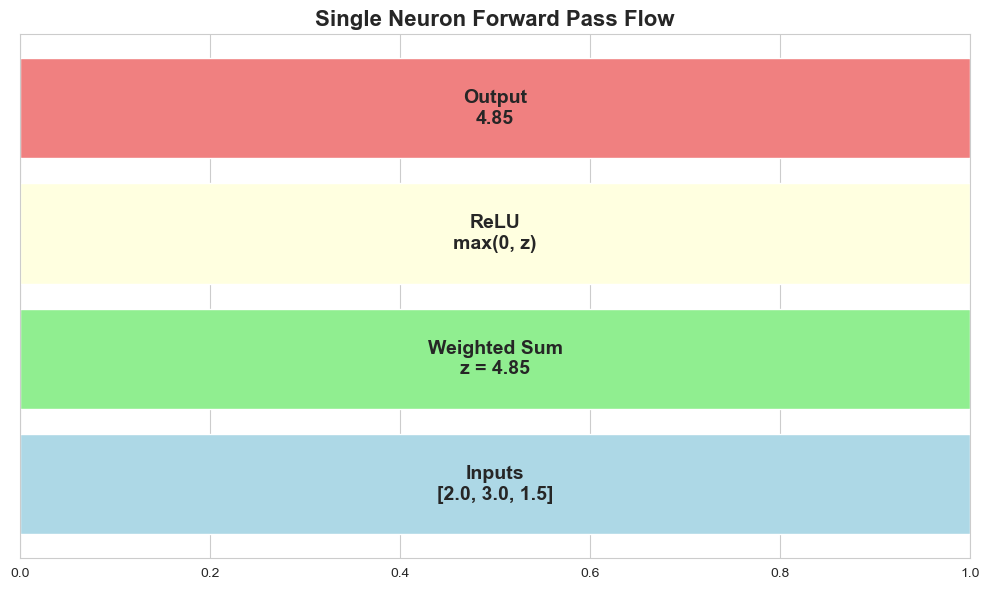


✅ This is what happens inside ONE neuron!


In [5]:
# Visualize single neuron computation
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Create flow diagram data
steps = ['Inputs\n[2.0, 3.0, 1.5]', 
         'Weighted Sum\nz = 4.85', 
         'ReLU\nmax(0, z)', 
         'Output\n4.85']
x_pos = np.arange(len(steps))

# Plot
ax.barh(x_pos, [1]*len(steps), color=['lightblue', 'lightgreen', 'lightyellow', 'lightcoral'])
for i, step in enumerate(steps):
    ax.text(0.5, i, step, ha='center', va='center', fontsize=14, fontweight='bold')

ax.set_yticks(x_pos)
ax.set_yticklabels([''] * len(steps))
ax.set_xlabel('')
ax.set_title('Single Neuron Forward Pass Flow', fontsize=16, fontweight='bold')
ax.set_xlim(0, 1)
plt.tight_layout()
plt.show()

print('\n✅ This is what happens inside ONE neuron!')

---
## Part 2: Multiple Neurons (One Layer)

**Now let's see multiple neurons working together**

In [6]:
# Input: 3 features
X = np.array([2.0, 3.0, 1.5])

# Layer with 4 neurons
# Each row = weights for one neuron
W = np.array([
    [0.5, 0.8, 0.3],  # Neuron 1 weights
    [0.2, 0.4, 0.6],  # Neuron 2 weights
    [0.9, 0.1, 0.5],  # Neuron 3 weights
    [0.3, 0.7, 0.2]   # Neuron 4 weights
])

# Biases (one per neuron)
b = np.array([1.0, 0.5, 0.8, 0.3])

print('📊 Layer Configuration:')
print(f'   Input size: {X.shape[0]} features')
print(f'   Number of neurons: {W.shape[0]}')
print(f'   Weight matrix shape: {W.shape}')
print(f'   Bias vector shape: {b.shape}')

📊 Layer Configuration:
   Input size: 3 features
   Number of neurons: 4
   Weight matrix shape: (4, 3)
   Bias vector shape: (4,)


In [7]:
# Forward pass: Z = W @ X + b
Z = np.dot(W, X) + b

print('⚙️  Weighted Sums (before activation):')
for i, z_val in enumerate(Z):
    print(f'   Neuron {i+1}: z = {z_val:.3f}')

# Apply ReLU
A = relu(Z)

print(f'\n⚡ After ReLU Activation:')
for i, a_val in enumerate(A):
    print(f'   Neuron {i+1}: output = {a_val:.3f}')

print(f'\n✅ Layer output shape: {A.shape}')
print(f'   We now have {A.shape[0]} values to pass to next layer!')

⚙️  Weighted Sums (before activation):
   Neuron 1: z = 4.850
   Neuron 2: z = 3.000
   Neuron 3: z = 3.650
   Neuron 4: z = 3.300

⚡ After ReLU Activation:
   Neuron 1: output = 4.850
   Neuron 2: output = 3.000
   Neuron 3: output = 3.650
   Neuron 4: output = 3.300

✅ Layer output shape: (4,)
   We now have 4 values to pass to next layer!


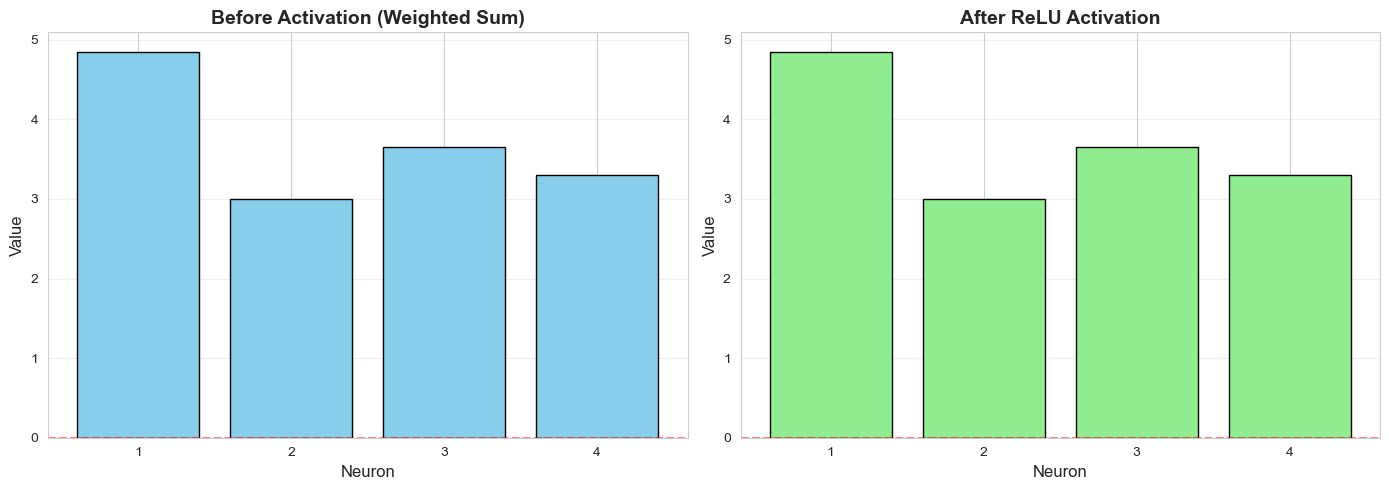


💡 Notice: ReLU keeps positive values, zeros out negatives!


In [8]:
# Visualize layer outputs
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before activation
axes[0].bar(range(1, 5), Z, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Neuron', fontsize=12)
axes[0].set_ylabel('Value', fontsize=12)
axes[0].set_title('Before Activation (Weighted Sum)', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(1, 5))
axes[0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[0].grid(axis='y', alpha=0.3)

# After activation
axes[1].bar(range(1, 5), A, color='lightgreen', edgecolor='black')
axes[1].set_xlabel('Neuron', fontsize=12)
axes[1].set_ylabel('Value', fontsize=12)
axes[1].set_title('After ReLU Activation', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(1, 5))
axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print('\n💡 Notice: ReLU keeps positive values, zeros out negatives!')

---
## Part 3: Multi-Layer Network (Complete Forward Pass)

**Full neural network with 2 hidden layers + output**

In [9]:
# Network architecture
print('🏗️  Network Architecture:')
print('   Input Layer:   3 features')
print('   Hidden Layer 1: 4 neurons (ReLU)')
print('   Hidden Layer 2: 3 neurons (ReLU)')
print('   Output Layer:  1 neuron (Sigmoid)')
print('\n📊 Total: 3 → 4 → 3 → 1')

🏗️  Network Architecture:
   Input Layer:   3 features
   Hidden Layer 1: 4 neurons (ReLU)
   Hidden Layer 2: 3 neurons (ReLU)
   Output Layer:  1 neuron (Sigmoid)

📊 Total: 3 → 4 → 3 → 1


In [10]:
# Initialize network parameters
np.random.seed(42)

# Input
X = np.array([2.0, 3.0, 1.5])

# Layer 1: 3 → 4
W1 = np.random.randn(4, 3) * 0.5
b1 = np.zeros(4)

# Layer 2: 4 → 3  
W2 = np.random.randn(3, 4) * 0.5
b2 = np.zeros(3)

# Output Layer: 3 → 1
W3 = np.random.randn(1, 3) * 0.5
b3 = np.zeros(1)

print('✅ Network initialized!')
print(f'\nParameter shapes:')
print(f'   W1: {W1.shape}, b1: {b1.shape}')
print(f'   W2: {W2.shape}, b2: {b2.shape}')
print(f'   W3: {W3.shape}, b3: {b3.shape}')

✅ Network initialized!

Parameter shapes:
   W1: (4, 3), b1: (4,)
   W2: (3, 4), b2: (3,)
   W3: (1, 3), b3: (1,)


In [11]:
# Sigmoid activation for output layer
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

print('✅ Activation functions defined:')
print('   • Hidden layers: ReLU')
print('   • Output layer: Sigmoid')

✅ Activation functions defined:
   • Hidden layers: ReLU
   • Output layer: Sigmoid


In [12]:
# FORWARD PASS - Layer by Layer
print('🚀 Starting Forward Propagation...\n')

# Input
print('📥 Input:')
print(f'   Shape: {X.shape}')
print(f'   Values: {X}')
print()

# Layer 1
Z1 = np.dot(W1, X) + b1
A1 = relu(Z1)
print('🔷 Layer 1 (Hidden):')
print(f'   Z1 (before activation): {Z1}')
print(f'   A1 (after ReLU): {A1}')
print()

# Layer 2
Z2 = np.dot(W2, A1) + b2
A2 = relu(Z2)
print('🔶 Layer 2 (Hidden):')
print(f'   Z2 (before activation): {Z2}')
print(f'   A2 (after ReLU): {A2}')
print()

# Output Layer
Z3 = np.dot(W3, A2) + b3
output = sigmoid(Z3)
print('🎯 Output Layer:')
print(f'   Z3 (before activation): {Z3}')
print(f'   Final Output (after Sigmoid): {output}')
print()

print('✅ Forward propagation complete!')
print(f'\n🎲 Final Prediction: {output[0]:.4f}')
print(f'   Interpretation: {output[0]*100:.2f}% probability of Class 1')

🚀 Starting Forward Propagation...

📥 Input:
   Shape: (3,)
   Values: [2.  3.  1.5]

🔷 Layer 1 (Hidden):
   Z1 (before activation): [ 0.7750841   0.99619708  2.37825912 -0.50186381]
   A1 (after ReLU): [0.7750841  0.99619708 2.37825912 0.        ]

🔶 Layer 2 (Hidden):
   Z2 (before activation): [-2.91038232 -1.31574678  0.53584147]
   A2 (after ReLU): [0.         0.         0.53584147]

🎯 Output Layer:
   Z3 (before activation): [-0.30837505]
   Final Output (after Sigmoid): [0.42351142]

✅ Forward propagation complete!

🎲 Final Prediction: 0.4235
   Interpretation: 42.35% probability of Class 1


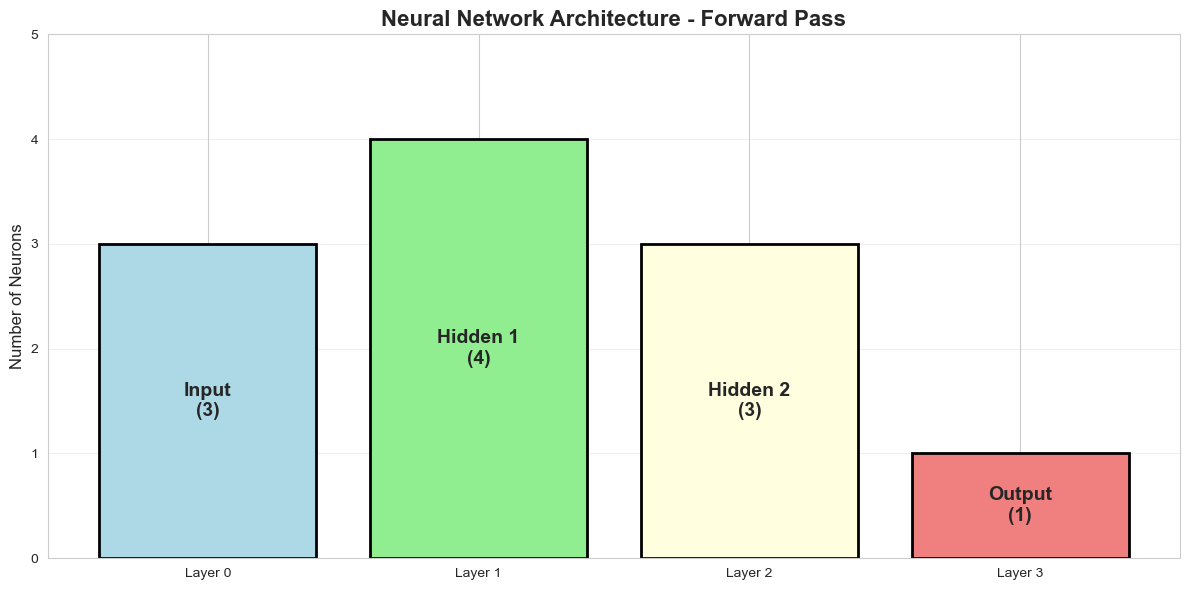


💡 Data flows left to right, transforming at each layer!


In [13]:
# Visualize data flow
layer_outputs = [X.shape[0], A1.shape[0], A2.shape[0], output.shape[0]]
layer_names = ['Input\n(3)', 'Hidden 1\n(4)', 'Hidden 2\n(3)', 'Output\n(1)']

fig, ax = plt.subplots(figsize=(12, 6))

# Plot layer sizes
x_pos = np.arange(len(layer_names))
colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral']
bars = ax.bar(x_pos, layer_outputs, color=colors, edgecolor='black', linewidth=2)

# Add labels
for i, (bar, name) in enumerate(zip(bars, layer_names)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height/2,
            name, ha='center', va='center', fontsize=14, fontweight='bold')

ax.set_ylabel('Number of Neurons', fontsize=12)
ax.set_title('Neural Network Architecture - Forward Pass', fontsize=16, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(['Layer ' + str(i) for i in range(len(layer_names))])
ax.set_ylim(0, max(layer_outputs) + 1)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print('\n💡 Data flows left to right, transforming at each layer!')

---
## Part 4: Visualizing Activation Functions

**See how different activations transform data**

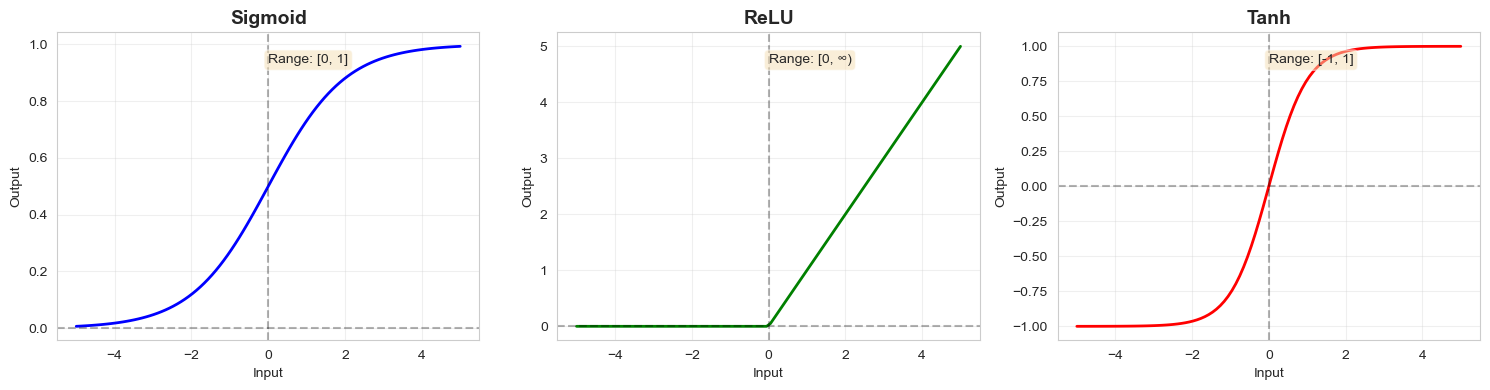


💡 Each activation function transforms data differently!
   • Sigmoid: Squashes to 0-1 (good for probabilities)
   • ReLU: Keeps positive, zeros negative (most popular)
   • Tanh: Squashes to -1 to 1 (zero-centered)


In [14]:
# Define activation functions
def tanh(x):
    return np.tanh(x)

# Create input range
x = np.linspace(-5, 5, 100)

# Calculate activations
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Sigmoid
axes[0].plot(x, y_sigmoid, 'b-', linewidth=2)
axes[0].set_title('Sigmoid', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Input')
axes[0].set_ylabel('Output')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[0].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[0].text(0.5, 0.9, 'Range: [0, 1]', transform=axes[0].transAxes, 
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# ReLU
axes[1].plot(x, y_relu, 'g-', linewidth=2)
axes[1].set_title('ReLU', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Input')
axes[1].set_ylabel('Output')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[1].text(0.5, 0.9, 'Range: [0, ∞)', transform=axes[1].transAxes,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Tanh
axes[2].plot(x, y_tanh, 'r-', linewidth=2)
axes[2].set_title('Tanh', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Input')
axes[2].set_ylabel('Output')
axes[2].grid(True, alpha=0.3)
axes[2].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[2].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[2].text(0.5, 0.9, 'Range: [-1, 1]', transform=axes[2].transAxes,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print('\n💡 Each activation function transforms data differently!')
print('   • Sigmoid: Squashes to 0-1 (good for probabilities)')
print('   • ReLU: Keeps positive, zeros negative (most popular)')
print('   • Tanh: Squashes to -1 to 1 (zero-centered)')

---
## Part 5: Understanding Weight Importance

**See which inputs matter most**

In [15]:
# Look at weights from first layer
print('⚖️  Weight Analysis - First Hidden Layer')
print('\nEach neuron\'s weights show what it "cares about":\n')

for i in range(W1.shape[0]):
    print(f'Neuron {i+1} weights: {W1[i]}')
    max_idx = np.argmax(np.abs(W1[i]))
    print(f'  → Most influenced by Input {max_idx+1} (weight = {W1[i, max_idx]:.3f})')
    print()

⚖️  Weight Analysis - First Hidden Layer

Each neuron's weights show what it "cares about":

Neuron 1 weights: [ 0.24835708 -0.06913215  0.32384427]
  → Most influenced by Input 3 (weight = 0.324)

Neuron 2 weights: [ 0.76151493 -0.11707669 -0.11706848]
  → Most influenced by Input 1 (weight = 0.762)

Neuron 3 weights: [ 0.78960641  0.38371736 -0.23473719]
  → Most influenced by Input 1 (weight = 0.790)

Neuron 4 weights: [ 0.27128002 -0.23170885 -0.23286488]
  → Most influenced by Input 1 (weight = 0.271)



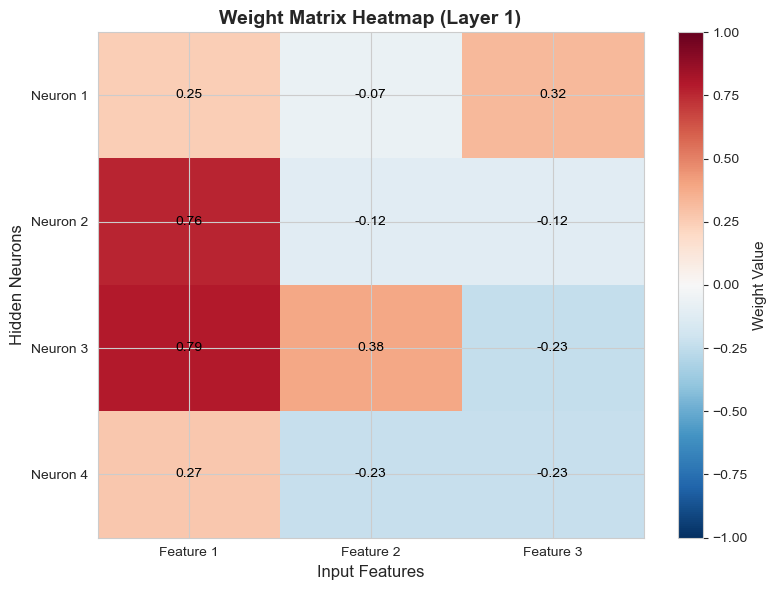


💡 Heatmap interpretation:
   • Red: Strong positive weight
   • Blue: Strong negative weight
   • White: Near zero (doesn't matter much)


In [16]:
# Visualize weight matrix as heatmap
fig, ax = plt.subplots(figsize=(8, 6))

im = ax.imshow(W1, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
ax.set_xlabel('Input Features', fontsize=12)
ax.set_ylabel('Hidden Neurons', fontsize=12)
ax.set_title('Weight Matrix Heatmap (Layer 1)', fontsize=14, fontweight='bold')
ax.set_xticks(range(3))
ax.set_xticklabels(['Feature 1', 'Feature 2', 'Feature 3'])
ax.set_yticks(range(4))
ax.set_yticklabels([f'Neuron {i+1}' for i in range(4)])

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Weight Value', fontsize=11)

# Add values
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        text = ax.text(j, i, f'{W1[i, j]:.2f}',
                      ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

print('\n💡 Heatmap interpretation:')
print('   • Red: Strong positive weight')
print('   • Blue: Strong negative weight')
print('   • White: Near zero (doesn\'t matter much)')

---
## 📚 Summary

### What We Observed:

**1. Forward Propagation Flow:**
- Data flows through network layer by layer
- Each layer: weighted sum → activation
- Output from one layer = input to next

**2. Mathematical Operations:**
- z = W · x + b (weighted sum)
- a = activation(z) (non-linearity)
- Matrix operations process all neurons at once

**3. Activation Functions:**
- ReLU: Most popular for hidden layers
- Sigmoid: Good for binary output (0-1)
- Tanh: Zero-centered alternative

**4. Weights Encode Learning:**
- Large weights = strong influence
- Small weights = weak influence
- Negative weights = suppression

**5. Layer Transformations:**
- Each layer extracts different features
- Deep networks learn hierarchical patterns
- Final layer produces prediction

### 🎯 Key Takeaways:
- Forward propagation is how networks make predictions
- It's a series of matrix multiplications + activations
- Each layer transforms data into more useful representations
- The process is deterministic (same input = same output)

### 💡 Remember:
- This is just the FORWARD direction
- To learn, we need BACKWARD propagation too
- That's coming in Day 3!

---

**Great job! You now understand how data flows through neural networks! 🎉**

**Next:** Learn how networks learn (Backpropagation)!